# CNN with bidirectional LSTM_ CNN seq2seq
## Forecastig the stock price 
### Load data and important libraries

In [1]:
import pandas as pd
import numpy as np

dataFrameFileLocation = "ETH_hourly_data.csv"
# load all data
df = pd.read_csv(dataFrameFileLocation,
                # parse_dates=[[' Date', ' Time']],
                 low_memory=False,
                 na_values=[np.nan,'NA','?'])
df.drop(columns= ["Unnamed: 0", "index", ] , inplace= True)

## Data Analysis commands

In [2]:
print ( f"data Shape : {df.shape}")
print ( f"data type : \n {df.dtypes}")
print ( f"data column : \n {df.columns}")
print ( f"data describtion : \n {df.describe}")
display(df.head(5))
display(df.tail(5))


data Shape : (16778, 6)
data type : 
 date      float64
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object
data column : 
 Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
data describtion : 
 <bound method NDFrame.describe of                date     open     high      low    close       volume
0      1.592050e+12   235.89   236.11   235.00   235.49   9425.79290
1      1.592050e+12   235.50   236.82   235.06   236.38  15799.02804
2      1.592050e+12   236.38   236.56   235.61   236.33   7264.88729
3      1.592060e+12   236.35   238.39   236.29   237.76  24624.57173
4      1.592060e+12   237.78   238.05   236.98   237.12  10134.14025
...             ...      ...      ...      ...      ...          ...
16773  1.652500e+12  2023.24  2045.41  2014.67  2036.00  18628.66590
16774  1.652510e+12  2036.00  2048.68  2027.24  2042.45  14366.44330
16775  1.652510e+12  2042.46  2048.40  2028.33  2031.94  13378.50320
16776

,date,open,high,low,close,volume
0,1.592050e+12,235.89,236.11,235.00,235.49,9425.79290
1,1.592050e+12,235.50,236.82,235.06,236.38,15799.02804
2,1.592050e+12,236.38,236.56,235.61,236.33,7264.88729
3,1.592060e+12,236.35,238.39,236.29,237.76,24624.57173
4,1.592060e+12,237.78,238.05,236.98,237.12,10134.14025


,date,open,high,low,close,volume
16773,1.652500e+12,2023.24,2045.41,2014.67,2036.00,18628.6659
16774,1.652510e+12,2036.00,2048.68,2027.24,2042.45,14366.4433
16775,1.652510e+12,2042.46,2048.40,2028.33,2031.94,13378.5032
16776,1.652520e+12,2031.94,2050.30,2027.66,2042.07,20804.8149
16777,1.652520e+12,2042.06,2053.98,2020.42,2028.75,25843.3283


## Data set description

In [3]:
df.describe()

,date,open,high,low,close,volume
count,1.677800e+04,16778.000000,16778.000000,16778.000000,16778.000000,16778.000000
mean,1.622291e+12,2119.478009,2134.271224,2103.466555,2119.582944,33901.192745
std,1.746250e+10,1332.625161,1340.570123,1324.080673,1332.547198,32151.450280
min,1.592050e+12,217.810000,220.140000,216.000000,217.840000,0.000000
25%,1.607160e+12,585.515000,588.637500,582.232500,585.612500,14854.433380
50%,1.622300e+12,2282.605000,2303.845000,2255.315000,2282.610000,24495.213250
75%,1.637420e+12,3157.267500,3176.197500,3137.350000,3157.257500,41062.288392
max,1.652520e+12,4846.940000,4868.000000,4833.190000,4846.710000,493227.882800


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16778 entries, 0 to 16777
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    16778 non-null  float64
 1   open    16778 non-null  float64
 2   high    16778 non-null  float64
 3   low     16778 non-null  float64
 4   close   16778 non-null  float64
 5   volume  16778 non-null  float64
dtypes: float64(6)
memory usage: 786.6 KB


## Plot data

Text(0.5, 1.0, 'Closing Price')

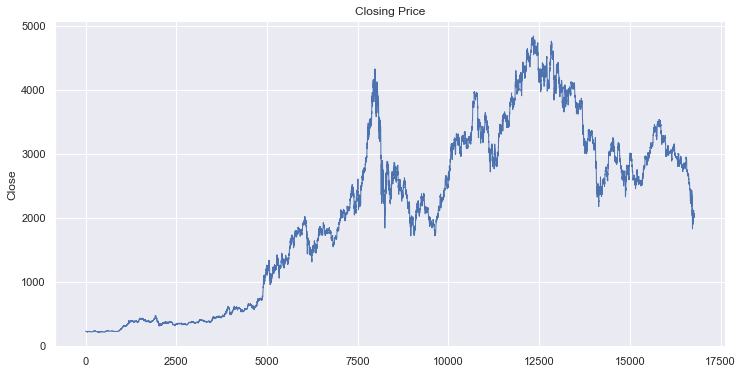

In [5]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults
sns.set(rc={'figure.figsize':(12, 6)})
df['close'].plot(linewidth=1);
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price")

Text(0.5, 1.0, 'Volume of Sales')

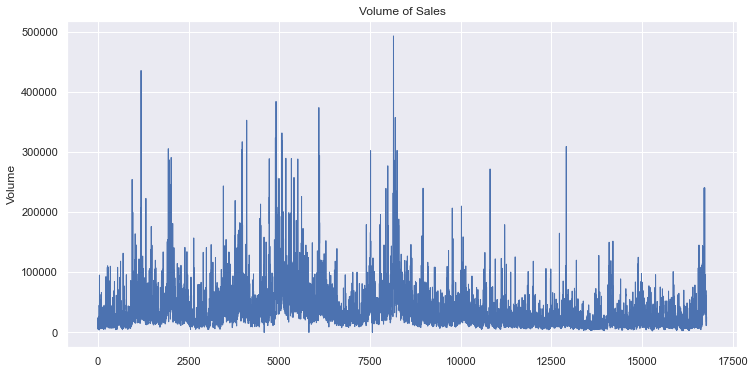

In [6]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults
sns.set(rc={'figure.figsize':(12, 6)})
df['volume'].plot(linewidth=1);
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of Sales")

### Import libraries

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from collections import deque
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

Instructions for updating:
non-resource variables are not supported in the long term


### Pre-process data

In [8]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [9]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.003813
1,0.004005
2,0.003994
3,0.004303
4,0.004165


## Construct the model

In [10]:
test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((16778, 6), (16748, 1), (30, 1))

In [11]:
def encoder_block(inp, n_hidden, filter_size):
    inp = tf.expand_dims(inp, 2)
    inp = tf.pad(
        inp,
        [
            [0, 0],
            [(filter_size[0] - 1) // 2, (filter_size[0] - 1) // 2],
            [0, 0],
            [0, 0],
        ],
    )
    conv = tf.layers.conv2d(
        inp, n_hidden, filter_size, padding = 'VALID', activation = None
    )
    conv = tf.squeeze(conv, 2)
    return conv


def decoder_block(inp, n_hidden, filter_size):
    inp = tf.expand_dims(inp, 2)
    inp = tf.pad(inp, [[0, 0], [filter_size[0] - 1, 0], [0, 0], [0, 0]])
    conv = tf.layers.conv2d(
        inp, n_hidden, filter_size, padding = 'VALID', activation = None
    )
    conv = tf.squeeze(conv, 2)
    return conv


def glu(x):
    return tf.multiply(
        x[:, :, : tf.shape(x)[2] // 2],
        tf.sigmoid(x[:, :, tf.shape(x)[2] // 2 :]),
    )


def layer(inp, conv_block, kernel_width, n_hidden, residual = None):
    z = conv_block(inp, n_hidden, (kernel_width, 1))
    return glu(z) + (residual if residual is not None else 0)

class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        kernel_size = 3,
        n_attn_heads = 16,
        dropout = 0.9,
    ):
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))

        encoder_embedded = tf.layers.dense(self.X, size_layer)

        e = tf.identity(encoder_embedded)
        for i in range(num_layers):
            z = layer(
                encoder_embedded,
                encoder_block,
                kernel_size,
                size_layer * 2,
                encoder_embedded,
            )
            z = tf.nn.dropout(z, keep_prob = dropout)
            encoder_embedded = z

        encoder_output, output_memory = z, z + e
        g = tf.identity(encoder_embedded)

        for i in range(num_layers):
            attn_res = h = layer(
                encoder_embedded,
                decoder_block,
                kernel_size,
                size_layer * 2,
                residual = tf.zeros_like(encoder_embedded),
            )
            C = []
            for j in range(n_attn_heads):
                h_ = tf.layers.dense(h, size_layer // n_attn_heads)
                g_ = tf.layers.dense(g, size_layer // n_attn_heads)
                zu_ = tf.layers.dense(
                    encoder_output, size_layer // n_attn_heads
                )
                ze_ = tf.layers.dense(output_memory, size_layer // n_attn_heads)

                d = tf.layers.dense(h_, size_layer // n_attn_heads) + g_
                dz = tf.matmul(d, tf.transpose(zu_, [0, 2, 1]))
                a = tf.nn.softmax(dz)
                c_ = tf.matmul(a, ze_)
                C.append(c_)

            c = tf.concat(C, 2)
            h = tf.layers.dense(attn_res + c, size_layer)
            h = tf.nn.dropout(h, keep_prob = dropout)
            encoder_embedded = h

        encoder_embedded = tf.sigmoid(encoder_embedded[-1])
        self.logits = tf.layers.dense(encoder_embedded, output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [12]:
num_layers = 1
size_layer = 128
timestamp = test_size
epoch = 300
dropout_rate = 0.7
future_day = test_size
learning_rate = 1e-3

In [13]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], 
        dropout = dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, _, loss = sess.run(
                [modelnn.logits, modelnn.optimizer, modelnn.cost],
                feed_dict = {modelnn.X: batch_x, modelnn.Y: batch_y},
            )        
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits = sess.run(
            modelnn.logits,
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                )
            },
        )
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits = sess.run(
            modelnn.logits,
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0)
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits = sess.run(
            modelnn.logits,
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0)
            },
        )
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    
    return deep_future[-test_size:]

In [14]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


train loop: 100%|████████████████████████████████████████████| 300/300 [38:39<00:00,  7.73s/it, acc=94.5, cost=0.00907]


simulation 2


train loop: 100%|████████████████████████████████████████████| 300/300 [47:10<00:00,  9.43s/it, acc=94.7, cost=0.00866]


simulation 3


train loop: 100%|████████████████████████████████████████████| 300/300 [52:18<00:00, 10.46s/it, acc=94.7, cost=0.00859]


simulation 4


train loop: 100%|████████████████████████████████████████████| 300/300 [48:48<00:00,  9.76s/it, acc=94.5, cost=0.00913]


simulation 5


train loop: 100%|████████████████████████████████████████████| 300/300 [46:27<00:00,  9.29s/it, acc=94.7, cost=0.00851]


simulation 6


train loop: 100%|████████████████████████████████████████████| 300/300 [44:07<00:00,  8.82s/it, acc=94.5, cost=0.00902]


simulation 7


train loop: 100%|████████████████████████████████████████████| 300/300 [46:29<00:00,  9.30s/it, acc=94.5, cost=0.00897]


simulation 8


train loop: 100%|████████████████████████████████████████████| 300/300 [45:38<00:00,  9.13s/it, acc=94.9, cost=0.00823]


simulation 9


train loop: 100%|████████████████████████████████████████████| 300/300 [38:09<00:00,  7.63s/it, acc=94.6, cost=0.00878]


simulation 10


train loop: 100%|████████████████████████████████████████████| 300/300 [35:23<00:00,  7.08s/it, acc=94.7, cost=0.00862]


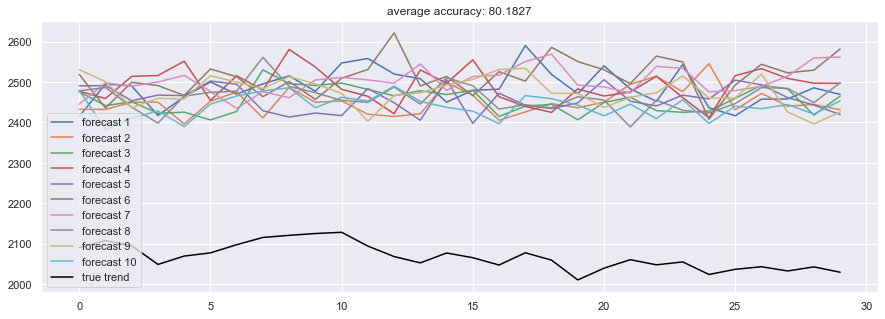

In [15]:
accuracies = [calculate_accuracy(df['close'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()

### The model needs further tuning
#### The prediction accuracy is 80.2
##### Further tuning can help us to improve the model 